<a href="https://colab.research.google.com/github/87tana/YOLO11n-Bone-Fracture-Detection-Model/blob/main/basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation , Import Libraries and Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/my_drive', force_remount=True)

# Navigate to the project directory
%cd '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/'

# Define dataset path
dataset_path = '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset'




Mounted at /content/my_drive
/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection


In [ ]:
!pip install ultralytics  torch torchvision torchaudio mlflow pyngrok pyyaml --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 623.0/623.0 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
# General libraries
import os
import time
import numpy as np
#import mlflow
from PIL import Image

from ultralytics import YOLO


# YOLOv11 (Ultralytics YOLOv8 package is compatible with YOLOv11 as well)
from ultralytics import YOLO
import subprocess

# MLflow
#from mlflow.tracking import MlflowClient
#from mlflow.entities import ViewType

# Google Colab tools
from google.colab import drive

# For ngrok to expose the MLflow UI remotely
#from pyngrok import ngrok

# Visualization
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Set Up MLflow Tracking

- MLflow is used to track experiments and log parameters, metrics, and models.

In [ ]:
# Set MLflow tracking directory
#mlflow_tracking_dir = '/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/runs/mlflow'
#mlflow.set_tracking_uri(f"file://{mlflow_tracking_dir}")
#mlflow.set_experiment("Base_Bone_Fraction_Detection")  # Set experiment name


# Define Dataset Paths and Parameters

- Specify the paths to your dataset and set hyperparameters for training YOLOv11.

In [ ]:
# Dataset path (ensure this is where your data is located)
dataset_path = '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset'



# Hyperparameters for training YOLOv11n
params = {
    'exp_id': '01',
    'model': 'yolo11n',
    'epochs': 40,
    'img_size': 640,
    'batch_size': 64  ,
    'lr': 0.001
}

# Start timer for training duration
start_time = time.time()

# Load the YOLOv11n model (ensure the weights file exists at the given path)
model_path = '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/models/yolo11n.pt'
model = YOLO(model_path)  # Load YOLOv11n model with custom weights

# Train the model with updated parameters
results = model.train(
    data=os.path.join(dataset_path, 'data.yaml'),
    epochs=params['epochs'],
    imgsz=params['img_size'],
    batch=params['batch_size'],
    lr0=params['lr'],
    optimizer='AdamW',
    project= "/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints",  # Save path
    name=params['exp_id'],
    save_period=10
)

# Log training time
training_duration = time.time() - start_time
print(f"Training completed in {training_duration:.2f} seconds")


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/models/yolo11n.pt, data=/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/data.yaml, epochs=40, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints, name=01, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream

100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.3MB/s]


AMP: checks passed ✅


train: Scanning /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/labels... 3779 images, 126 backgrounds, 0 corrupt: 100%|██████████| 3779/3779 [26:53<00:00,  2.34it/s]


train: New cache created: /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/valid/labels... 835 images, 5 backgrounds, 0 corrupt: 100%|██████████| 835/835 [06:29<00:00,  2.14it/s]


val: New cache created: /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/valid/labels.cache
Plotting labels to /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2024/12/19 13:18:16 INFO mlflow.tracking.fluent: Experiment with name '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints' does not exist. Creating a new experiment.
2024/12/19 13:18:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/12/19 13:18:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 13:18:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/12/19 13:18:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/12/19 13:18:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


MLflow: logging run_id(c3c8d079fb1e45cd806146d8cc52d85d) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       9.6G      1.195      1.928      1.638         10        640: 100%|██████████| 60/60 [01:28<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        835       1373      0.592      0.293      0.106     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      8.82G      1.165      1.203      1.608          9        640: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.35s/it]

                   all        835       1373      0.594      0.146     0.0938     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       8.8G      1.176       1.14      1.606         10        640: 100%|██████████| 60/60 [01:27<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.88s/it]


                   all        835       1373      0.157       0.28      0.129     0.0565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       8.8G      1.163      1.108       1.59          5        640: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.44s/it]


                   all        835       1373     0.0447      0.224     0.0338     0.0137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       8.8G      1.104      1.032       1.54          8        640: 100%|██████████| 60/60 [01:25<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.79s/it]

                   all        835       1373      0.362      0.445      0.288       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      8.76G      1.086     0.9759      1.511          9        640: 100%|██████████| 60/60 [01:27<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        835       1373      0.558      0.309      0.171     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      8.87G      1.046     0.9249      1.486         10        640: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]


                   all        835       1373      0.373      0.451      0.311      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      8.87G       1.01     0.8903      1.454          8        640: 100%|██████████| 60/60 [01:28<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.61s/it]

                   all        835       1373      0.421      0.542      0.326      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      8.86G     0.9911     0.8643      1.447          5        640: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.83s/it]

                   all        835       1373      0.366      0.583      0.273      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      8.88G      0.971     0.8163      1.417          7        640: 100%|██████████| 60/60 [01:23<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]

                   all        835       1373      0.396      0.566      0.366      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      8.79G     0.9512     0.8149       1.41          6        640: 100%|██████████| 60/60 [01:30<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.85s/it]

                   all        835       1373      0.306      0.617      0.332      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      8.81G     0.9329     0.7884      1.397         11        640: 100%|██████████| 60/60 [01:31<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


                   all        835       1373      0.393      0.586      0.303      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       8.8G     0.9077     0.7598      1.375          9        640: 100%|██████████| 60/60 [01:32<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]


                   all        835       1373       0.31       0.59      0.263      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      8.81G     0.9082     0.7396      1.369         10        640: 100%|██████████| 60/60 [01:27<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.79s/it]

                   all        835       1373      0.395      0.592      0.374      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      8.79G     0.8956     0.7218      1.362          9        640: 100%|██████████| 60/60 [01:24<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]

                   all        835       1373      0.447      0.542      0.366      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      8.81G      0.878     0.7165      1.349          7        640: 100%|██████████| 60/60 [01:30<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.82s/it]

                   all        835       1373      0.454      0.626      0.354      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      8.79G     0.8725     0.6913      1.348          6        640: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.43s/it]

                   all        835       1373      0.483      0.631      0.426      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       8.8G     0.8471     0.6876      1.325          8        640: 100%|██████████| 60/60 [01:24<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]

                   all        835       1373      0.418      0.588      0.365      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      8.87G     0.8421      0.661      1.326          5        640: 100%|██████████| 60/60 [01:30<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        835       1373      0.434      0.657      0.414      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      8.79G     0.8171     0.6434      1.299          3        640: 100%|██████████| 60/60 [01:27<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]

                   all        835       1373      0.531      0.585      0.419       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       8.8G     0.8262      0.654      1.299          9        640: 100%|██████████| 60/60 [01:24<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.76s/it]


                   all        835       1373      0.527       0.63      0.452      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      8.82G     0.7955     0.6299      1.284          8        640: 100%|██████████| 60/60 [01:28<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.75s/it]

                   all        835       1373      0.458       0.64      0.401      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      8.79G     0.7953     0.6213      1.292          4        640: 100%|██████████| 60/60 [01:25<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.92s/it]

                   all        835       1373      0.432      0.659      0.379      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      8.87G     0.7985     0.6232      1.289          4        640: 100%|██████████| 60/60 [01:26<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]

                   all        835       1373      0.449      0.618      0.386      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      8.79G     0.7692     0.6012      1.271          7        640: 100%|██████████| 60/60 [01:25<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.52s/it]

                   all        835       1373      0.476      0.673      0.429      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       8.8G     0.7698     0.5966      1.261          9        640: 100%|██████████| 60/60 [01:22<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.92s/it]

                   all        835       1373      0.532      0.647      0.459      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      8.79G     0.7594     0.5911       1.26          9        640: 100%|██████████| 60/60 [01:29<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]

                   all        835       1373      0.498      0.664      0.449      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      8.86G     0.7502     0.5782      1.253          8        640: 100%|██████████| 60/60 [01:23<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]

                   all        835       1373      0.549      0.643      0.463      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      8.85G     0.7489     0.5705      1.246         14        640: 100%|██████████| 60/60 [01:24<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]

                   all        835       1373      0.502      0.696      0.455      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.79G     0.7546     0.5737      1.256          7        640: 100%|██████████| 60/60 [01:27<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.91s/it]

                   all        835       1373      0.555      0.673      0.465      0.245


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.81G     0.6877     0.5556      1.269          5        640: 100%|██████████| 60/60 [01:27<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        835       1373       0.54      0.683      0.465      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.81G     0.6576      0.474      1.242          4        640: 100%|██████████| 60/60 [01:23<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]

                   all        835       1373       0.59      0.661      0.493      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.81G     0.6311     0.4603      1.213          4        640: 100%|██████████| 60/60 [01:27<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.46s/it]

                   all        835       1373      0.511      0.664      0.448      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.81G     0.6181     0.4264      1.211          3        640: 100%|██████████| 60/60 [01:19<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]

                   all        835       1373      0.587      0.684      0.519      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.81G     0.5938     0.4089      1.187          3        640: 100%|██████████| 60/60 [01:19<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]

                   all        835       1373      0.548      0.672      0.486      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.81G      0.596     0.4088       1.19          3        640: 100%|██████████| 60/60 [01:23<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.89s/it]

                   all        835       1373      0.538      0.691      0.488      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.81G     0.5779     0.3959      1.176          4        640: 100%|██████████| 60/60 [01:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]

                   all        835       1373      0.543      0.704      0.495      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      8.88G     0.5704     0.3957      1.169          3        640: 100%|██████████| 60/60 [01:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]

                   all        835       1373      0.566      0.694      0.501      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.81G     0.5683      0.401      1.162          7        640: 100%|██████████| 60/60 [01:22<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        835       1373      0.545      0.709      0.505      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      8.81G     0.5462     0.3769       1.15          3        640: 100%|██████████| 60/60 [01:22<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.43s/it]

                   all        835       1373      0.552      0.701      0.507      0.281



40 epochs completed in 1.119 hours.
Optimizer stripped from /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01/weights/last.pt, 5.5MB
Optimizer stripped from /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01/weights/best.pt, 5.5MB

Validating /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.12s/it]


                   all        835       1373      0.546      0.708      0.505      0.282
           No_fracture        187        202      0.363      0.936      0.466      0.352
              Fracture        643       1171      0.729       0.48      0.544      0.211
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/01
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
Training completed in 6099.84 seconds


# Train YOLOv11n

- This part starts the experiment, logs parameters, and trains the YOLOv11n model.

In [ ]:
# Run MLflow UI in the background
#mport subprocess
#subprocess.Popen(["mlflow", "ui", "--backend-store-uri", mlflow_tracking_dir])

# Set up Ngrok for remote access
#NGROK_AUTH_TOKEN = "2qGXY4i9cF4CQHjBRFLtxjuQCTz_Z9PruXmBce21Hfpju7AY"  # Replace with your Ngrok token
#ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for accessing MLflow UI
#ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)

#print("MLflow Tracking UI:", ngrok_tunnel.public_url)

#Terminate open tunnels if exist
#ngrok.kill()


# inference


image 1/1 /content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/images/negative_687_jpg.rf.9e3e5a1f01a629a4158a530cdba908a8.jpg: 640x640 1 No_fracture, 15.7ms
Speed: 1.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


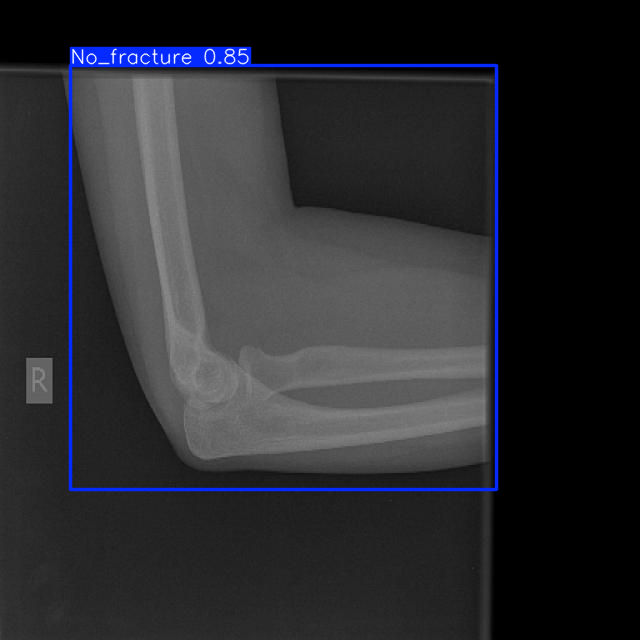

In [ ]:
# nference on a specific image from your training dataset using a trained YOLO model

image_list = os.listdir('/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/images')

# Run inference on a test image
test_image_path = os.path.join("/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/images/", image_list[5])  # Example image index

# Load the YOLOv11n model (ensure the weights file exists at the given path)
model_inf_path = '/content/my_drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Model_Checkpoints/YOLOv11n_experiment/weights/last.pt'
model_inf = YOLO(model_inf_path)  # Load YOLOv11n model with custom weights
results = model_inf(test_image_path)  # Get predictions for the test image

# Visualize the results
for r in results:
    # Plot the prediction results
    im_bgr = r.plot()  # Convert to BGR
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert to RGB
    r.show()  # Show the result
